# Preparation pour le modèle de prédiction

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [148]:
df = pd.read_csv('data/kc_house_data_clean.csv')

# 1. On enlève les colonnes inutiles

In [149]:
# convertir la colonne zipcode en colonnes binaires
zip_dummies = pd.get_dummies(df['zipcode'], prefix='zip')

# ajouter les colonnes binaires au dataframe
df = pd.concat([df, zip_dummies], axis=1)
df

,id,date,price,bedrooms,bathrooms,surface,sqft_lot,floors,waterfront,view,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21597,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21598,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,1,0,0,0,0,0,0,0,0,0
21599,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21600,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='bedrooms', ylabel='bathrooms'>

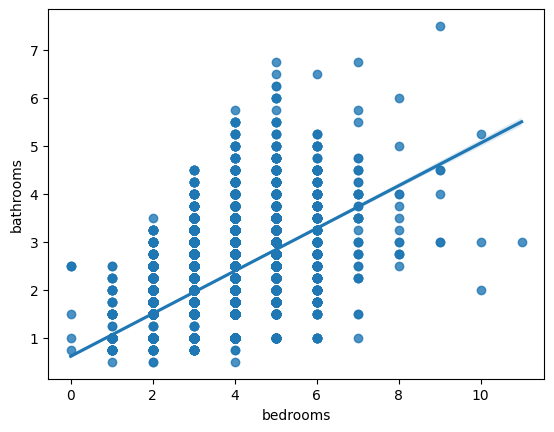

In [150]:
df_drop = df.drop(['date', 'id', 'zipcode' , 'lat' , 'long' , 'yr_built' , 'yr_renovated'], axis=1)
df_drop = df_drop[df_drop['surface'] <= 10000]
df_drop = df_drop[df_drop['price'] <= 5000000]
# Ratio chambres/salle de bain
df_drop['ratio_bed_bath'] = df_drop['bedrooms'] / df_drop['bathrooms']


df_drop[['ratio_bed_bath', 'price']].corr()

# correration entre la salle de bain et les chambres
df_drop[['bedrooms', 'bathrooms']].corr()
# graphique
sns.regplot(x='bedrooms', y='bathrooms', data=df_drop)


In [151]:
df_drop

,price,bedrooms,bathrooms,surface,sqft_lot,floors,waterfront,view,condition,grade,...,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,ratio_bed_bath
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,1,0,0,0,3.000000
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,1.333333
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,2.000000
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,1.333333
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21597,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,1.200000
21598,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,1.600000
21599,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,2.666667
21600,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,1.200000


In [152]:
df_drop.to_csv('data/kc_house_data_clean_model.csv', index=False)